# Example: Metadata
-------------------

This example shows how to add metadata like `groups` and `sample_weight` to atom.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [1]:
# Import packages
import numpy as np
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [2]:
# Load data
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [3]:
# Create (dummy) groups and sample_weights for the rows
groups = np.random.randint(5, size=X.shape[0])
sample_weight = np.random.randint(5, size=X.shape[0])
print(groups)

[3 2 4 4 4 2 3 1 3 4 4 3 4 4 2 0 4 0 4 4 0 0 4 1 4 0 1 4 4 3 1 1 0 0 2 0 3
 0 2 4 1 0 2 4 4 1 1 1 0 3 1 1 0 2 3 4 4 0 1 1 3 3 0 2 0 4 4 4 2 0 0 4 1 0
 2 4 3 0 4 3 1 2 2 0 2 4 2 0 3 0 0 3 4 2 3 1 3 0 2 0 1 2 4 3 3 3 0 2 4 0 4
 3 4 1 4 3 3 0 0 4 2 2 3 2 3 1 0 2 4 0 4 4 0 2 0 2 3 4 4 4 2 4 2 2 4 3 2 2
 4 3 4 2 1 1 0 0 1 4 3 2 3 0 0 4 2 0 1 3 1 4 4 1 1 3 0 1 1 2]


## Run the pipeline

Add the metadata to the constructor. We leave `index=True` to prove the group functionality works.  
When groups are specified, `test_size` specifies the number of groups in the test set.

In [4]:
atom = ATOMClassifier(
    X,
    y=y,
    index=True,
    metadata={"groups": groups, "sample_weight": sample_weight},
    test_size=1,
    verbose=2,
    random_state=1,
)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Multiclass classification.

Dataset stats ==================== >>
Shape: (178, 14)
Train set size: 145
Test set size: 33
-------------------------------------
Memory: 24.82 kB
Scaled: False
Outlier values: 9 (0.4%)



In [5]:
# Show all rows in the test set belong to the same group
atom.metadata["groups"].loc[atom.test.index]

34     2
120    2
53     2
68     2
151    2
81     2
164    2
5      2
135    2
140    2
143    2
74     2
146    2
133    2
38     2
142    2
63     2
127    2
123    2
86     2
84     2
159    2
1      2
101    2
177    2
42     2
121    2
107    2
147    2
93     2
98     2
82     2
14     2
Name: groups, dtype: int64

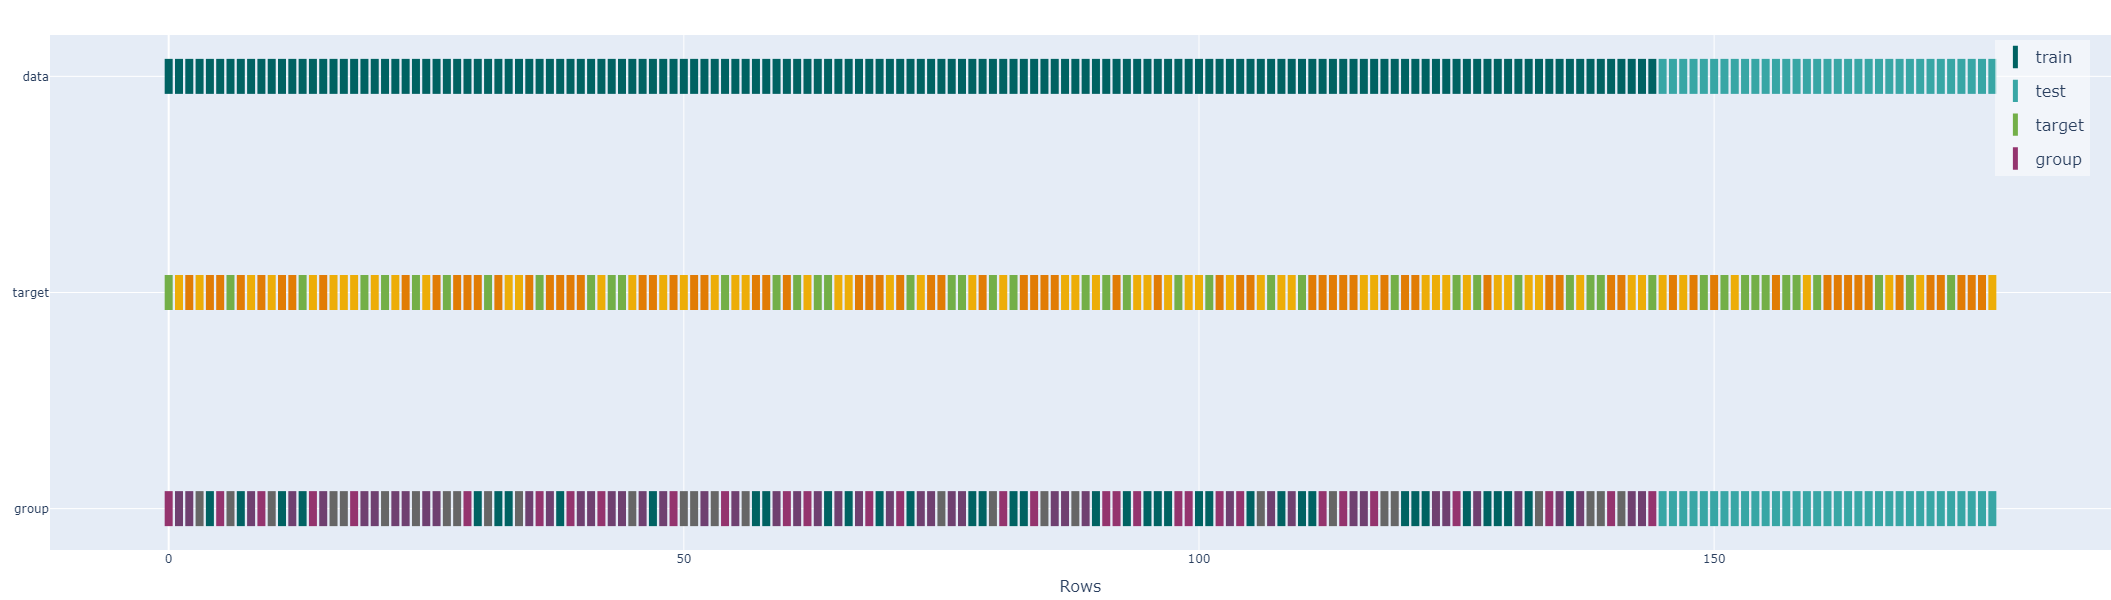

In [14]:
# Visualize the groups
atom.plot_data_splits()

In [6]:
atom.scale()

Fitting Scaler...
Scaling features...


In [7]:
# Note the sample weights are passed to the scaler
atom.pipeline[0].get_metadata_routing()

{'fit': {'sample_weight': True}}

In [9]:
atom.run("LR")


Training ========================= >>
Models: LR
Metric: f1_weighted


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 1.0
Time elapsed: 0.036s
-------------------------------------------------
Time: 0.036s


Final results ==================== >>
Total time: 0.040s
-------------------------------------
LogisticRegression --> f1_weighted: 1.0


In [10]:
# The same applies to models...
atom.lr.estimator.get_metadata_routing()

{'fit': {'sample_weight': True}, 'score': {'sample_weight': None}}

In [11]:
# ... and metrics
atom._metric[0].get_metadata_routing()

{'score': {'sample_weight': True}}

In [16]:
atom.lr.cross_validate()

Applying cross-validation...


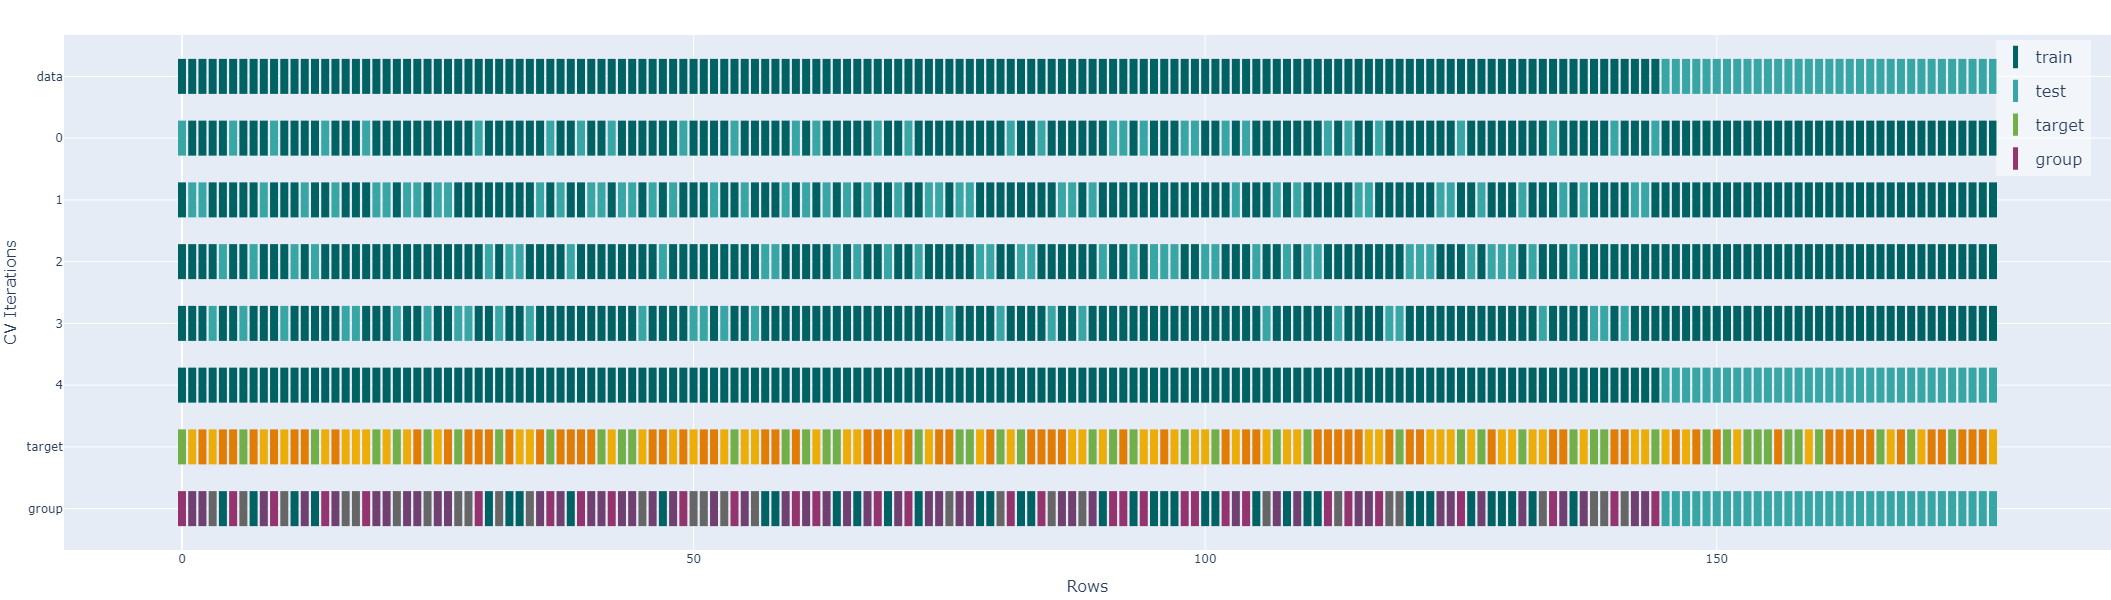

In [17]:
atom.plot_cv_splits()